In [3]:
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc('font',family='Malgun Gothic')
import seaborn as sns
import pandas as pd
import scipy
scipy.__version__
import scipy.stats as stats

### Delivery List dataset 1

In [7]:
df_DL = pd.read_csv('../../datasets/DeliveryList.csv')
df_DL[:2]

,날짜,상품명,바코드,발주가능상태,입고수량,카테고리,출고수량
0,2019-05-16,V2_0,8.801047e+12,발주가능,384,세탁세제,72
1,2019-05-16,V2_3,8.801047e+12,발주가능,207,세탁세제,5


In [8]:
df_DL.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   날짜      15000 non-null  object 
 1   상품명     15000 non-null  object 
 2   바코드     14992 non-null  float64
 3   발주가능상태  15000 non-null  object 
 4   입고수량    15000 non-null  int64  
 5   카테고리    15000 non-null  object 
 6   출고수량    15000 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 820.4+ KB


In [9]:
df_DL.describe(include=object)

,날짜,상품명,발주가능상태,카테고리
count,15000,15000,15000,15000
unique,84,528,3,8
top,2019-05-26,V2_114,발주가능,세탁세제
freq,226,47,14700,4265


In [15]:
df_DL['날짜_datatime'] = pd.to_datetime(df_DL['날짜'])

In [16]:
df_DL.describe(include=object) #확인 필요

,날짜,상품명,발주가능상태,카테고리
count,15000,15000,15000,15000
unique,84,528,3,8
top,2019-05-26,V2_114,발주가능,세탁세제
freq,226,47,14700,4265


In [17]:
df_DL[:2]

,날짜,상품명,바코드,발주가능상태,입고수량,카테고리,출고수량,날짜_datatime
0,2019-05-16,V2_0,8.801047e+12,발주가능,384,세탁세제,72,2019-05-16
1,2019-05-16,V2_3,8.801047e+12,발주가능,207,세탁세제,5,2019-05-16


In [20]:
# df_DL['날짜_datatime_year'] =df_DL['날짜_datatime'].dt.year
df_DL['날짜_datatime_month'] =df_DL['날짜_datatime'].dt.month

In [32]:
pd.pivot_table(data=df_DL, index='날짜_datatime_month', values='출고수량', aggfunc=sum)  # 1차방법 - 2차 데이터 사용시 

,출고수량
날짜_datatime_month,
5,19427
6,39397
7,40584
8,8670


<Axes: xlabel='날짜_datatime_month', ylabel='출고수량'>

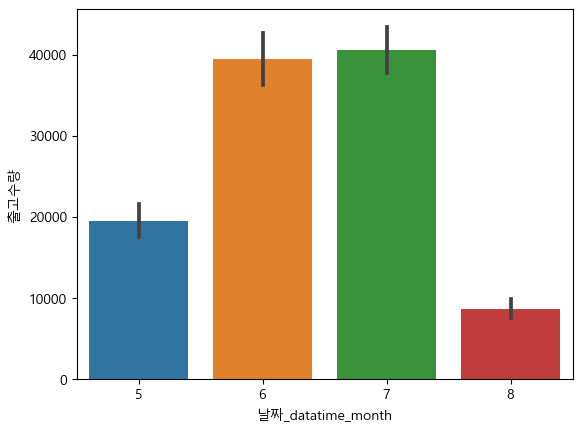

In [31]:
sns.barplot(data=df_DL,x='날짜_datatime_month',y='출고수량',estimator=sum)  # 2차방법 - 단순시각화

In [43]:
df_DL['날짜_datatime_week'] = df_DL['날짜_datatime'].dt.isocalendar().week

In [47]:
sns.lineplot(data=df_DL, x='날짜_datatime_week', y='출고수량', estimator=sum)

ValueError: Could not interpret value `날짜_datatime_week` for parameter `x`

### Delivery List dataset 2

In [48]:
df_DL2 = pd.read_csv('../../datasets/DeliveryList2.csv')
df_DL2[:2]

,결제수단,배송번호,배송시작일,배송완료일,상품구매금액,상품번호,수량,주문경로,주문일
0,무통장입금,D-20181227-0000648-00,2019-01-07 오전 8:56,2019-01-11 오전 5:32,71450,1077.0,1,PC쇼핑몰,20181227
1,무통장입금,D-20181229-0000119-00,2019-01-03 오전 9:30,2019-01-07 오전 5:32,141240,42.0,2,모바일웹,20181229


#### int형은 string and then datetime 순서로 변환

In [49]:
df_DL2.describe(datetime_is_numeric=True) #date time 보는법 

,상품구매금액,상품번호,수량,주문일
count,4.674900e+04,46661.000000,46749.000000,4.674900e+04
mean,6.936814e+04,763.193073,1.177822,2.018404e+07
std,6.611247e+04,456.323734,0.683334,5.192403e+03
min,0.000000e+00,38.000000,1.000000,2.017010e+07
25%,3.288000e+04,378.000000,1.000000,2.018073e+07
50%,6.778000e+04,928.000000,1.000000,2.018112e+07
75%,9.213000e+04,1209.000000,1.000000,2.019022e+07
max,4.963400e+06,1681.000000,50.000000,2.019062e+07


In [50]:
df_DL2['주문일'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 46749 entries, 0 to 46748
Series name: 주문일
Non-Null Count  Dtype
--------------  -----
46749 non-null  int64
dtypes: int64(1)
memory usage: 365.4 KB


In [54]:
pd.to_datetime(df_DL2['주문일'].astype(str)) 

0       2018-12-27
1       2018-12-29
2       2018-12-30
3       2018-12-31
4       2018-12-31
           ...    
46744   2017-12-29
46745   2017-12-29
46746   2017-12-30
46747   2017-12-31
46748   2017-12-31
Name: 주문일, Length: 46749, dtype: datetime64[ns]

#### 특정 기호가 들어간 string 경우 apply() 적용 후 datetime 변환 

In [59]:
# str('2019-01-11 오전 5:32')[:10]
def slicing_YMD(datetime_str):
    return datetime_str[:10] 

In [61]:
df_DL2['배송시작일_datetime'] = pd.to_datetime(df_DL2['배송시작일'].apply(slicing_YMD))
df_DL2['배송완료일_datetime'] = pd.to_datetime(df_DL2['배송완료일'].apply(slicing_YMD))

In [62]:
df_DL2[['배송시작일_datetime','배송완료일_datetime']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46749 entries, 0 to 46748
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   배송시작일_datetime  46749 non-null  datetime64[ns]
 1   배송완료일_datetime  46749 non-null  datetime64[ns]
dtypes: datetime64[ns](2)
memory usage: 730.6 KB


In [70]:
df_DL2['배송_duration']=df_DL2['배송완료일_datetime'] - df_DL2['배송시작일_datetime'] 
df_DL2['배송_duration']

0       4 days
1       4 days
2       4 days
3       4 days
4       4 days
         ...  
46744   4 days
46745   4 days
46746   9 days
46747   3 days
46748   4 days
Name: 배송_duration, Length: 46749, dtype: timedelta64[ns]

In [69]:
df_DL2['배송_duration'].describe()    

count                        46749
mean     4 days 04:38:57.008278251
std      1 days 04:56:12.144368428
min                0 days 00:00:00
25%                4 days 00:00:00
50%                4 days 00:00:00
75%                4 days 00:00:00
max               47 days 00:00:00
Name: 배송_duration, dtype: object